In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
from skmap.misc import find_files, GoogleSheet, ttprint
import warnings
import time
from scipy.special import expit, logit
import warnings
import joblib
import pickle
from pathlib import Path
from trees_rf import TreesRandomForestRegressor
from model_fit import read_features, cfi_calc, parameter_fine_tuning, calc_ccc, separate_data, rscfi 
from model_fit import accuracy_plot, plot_top_features, pdp_hexbin, plot_histogram, calc_metrics, accuracy_strata_plot
from model_fit import textures_fw_transform, textures_bw_transform

import warnings
warnings.filterwarnings('ignore')
import os
import json
from datetime import datetime

data_path = '/home/xuemeng/work_xuemeng/soc/SoilHealthDataCube/soil_property_model_pipeline'
version = '20250212'
output_folder = data_path + '/texture'
os.makedirs(output_folder, exist_ok=True)
prop_list = ['texture1','texture2']
space = 'log1p'

## Prepare and separate data

In [2]:
version = '20250212'
df = pd.read_parquet(f'/home/xuemeng/work_xuemeng/soc/SoilHealthDataCube/soil_property_model_pipeline/soil_organized.pq')
data_path = '/home/xuemeng/work_xuemeng/soc/SoilHealthDataCube/soil_property_model_pipeline'

In [3]:
dff = df.dropna(subset=['clay','silt','sand'])
print(f'dropping {len(df)-len(dff)} records without full valid texture records')

dropping 355440 records without full valid texture records


In [4]:
mask =  (df['sand_qa']>2) & (df['clay_qa']>2) & (df['silt_qa']>2)
dff = dff.loc[mask]
print(f'dropping {np.sum(mask)} records without full quanlified texture records')

dropping 91247 records without full quanlified texture records


In [5]:
print(f'{len(dff)} data remaining')
tx1, tx2 = textures_fw_transform(dff['sand'],dff['silt'],dff['clay'])
dff['texture1'] = tx1
dff['texture2'] = tx2

53929 data remaining


In [6]:
# cal, train, test = separate_data(prop_list[0], space, output_folder, version, dff, strata_col = ['tile_id'])

drop invalid 0 records
61 small strata groups, with 258 data records
size: calibration 6095, training 42417, test 5417
ratio: calibration 0.11, training 0.79, test 0.10
sum 53929, df 53929


# Model calibration

In [7]:
with open(f'/home/xuemeng/work_xuemeng/soc/SoilHealthDataCube/soil_property_model_pipeline/cov_all.json', "r") as file:
    covar_cols = json.load(file)
print('total cov number: ', len(covar_cols))

total cov number:  593


start bootstrap on different subset...
[13:42:31] 0 iteration, training size: 4262
[13:42:36] 1 iteration, training size: 4262
[13:42:42] 2 iteration, training size: 4262
[13:42:47] 3 iteration, training size: 4262
[13:42:53] 4 iteration, training size: 4262
[13:42:58] 5 iteration, training size: 4262
[13:43:03] 6 iteration, training size: 4262
[13:43:09] 7 iteration, training size: 4262
[13:43:14] 8 iteration, training size: 4262
[13:43:20] 9 iteration, training size: 4262
[13:43:25] 10 iteration, training size: 4262
[13:43:30] 11 iteration, training size: 4262
[13:43:36] 12 iteration, training size: 4262
[13:43:41] 13 iteration, training size: 4262
[13:43:47] 14 iteration, training size: 4262
[13:43:52] 15 iteration, training size: 4262
[13:43:57] 16 iteration, training size: 4262
[13:44:03] 17 iteration, training size: 4262
[13:44:08] 18 iteration, training size: 4262
[13:44:14] 19 iteration, training size: 4262
[13:44:19] processing 0.0 ...
[13:44:49] processing 0.0002 ...
[13:45:1

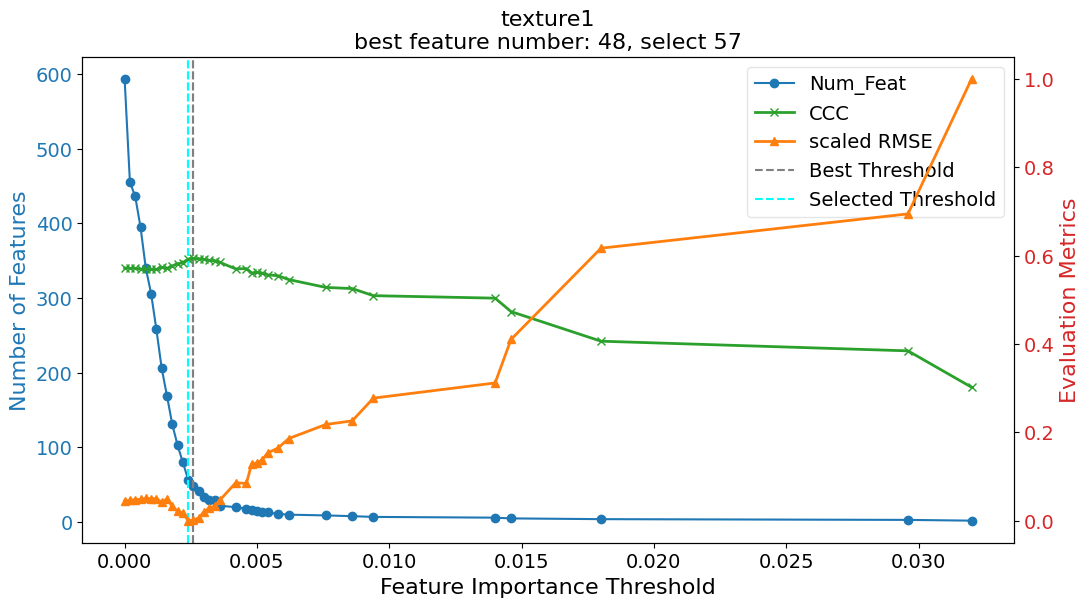

[13:48:33] ----------------------rf------------------------
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 75
max_resources_: 6089
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 135
n_resources: 75
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 1
n_candidates: 45
n_resources: 225
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 2
n_candidates: 15
n_resources: 675
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 3
n_candidates: 5
n_resources: 2025
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 6075
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [9]:
prop = prop_list[0]   
tgt = prop
cfi1 = cfi_calc(cal, tgt, prop, space, output_folder, version, covar_cols) 
covs1 = rscfi(cal, tgt, prop, space, output_folder, version, covar_cols, cfi1)
models, model_names = parameter_fine_tuning(cal, covs1, tgt, prop, output_folder, version)

start bootstrap on different subset...
[13:49:12] 0 iteration, training size: 4262
[13:49:18] 1 iteration, training size: 4262
[13:49:24] 2 iteration, training size: 4262
[13:49:30] 3 iteration, training size: 4262
[13:49:36] 4 iteration, training size: 4262
[13:49:42] 5 iteration, training size: 4262
[13:49:48] 6 iteration, training size: 4262
[13:49:54] 7 iteration, training size: 4262
[13:50:01] 8 iteration, training size: 4262
[13:50:06] 9 iteration, training size: 4262
[13:50:12] 10 iteration, training size: 4262
[13:50:18] 11 iteration, training size: 4262
[13:50:24] 12 iteration, training size: 4262
[13:50:31] 13 iteration, training size: 4262
[13:50:37] 14 iteration, training size: 4262
[13:50:43] 15 iteration, training size: 4262
[13:50:49] 16 iteration, training size: 4262
[13:50:55] 17 iteration, training size: 4262
[13:51:01] 18 iteration, training size: 4262
[13:51:08] 19 iteration, training size: 4262
[13:51:14] processing 0.0 ...
[13:52:05] processing 0.0002 ...
[13:52:3

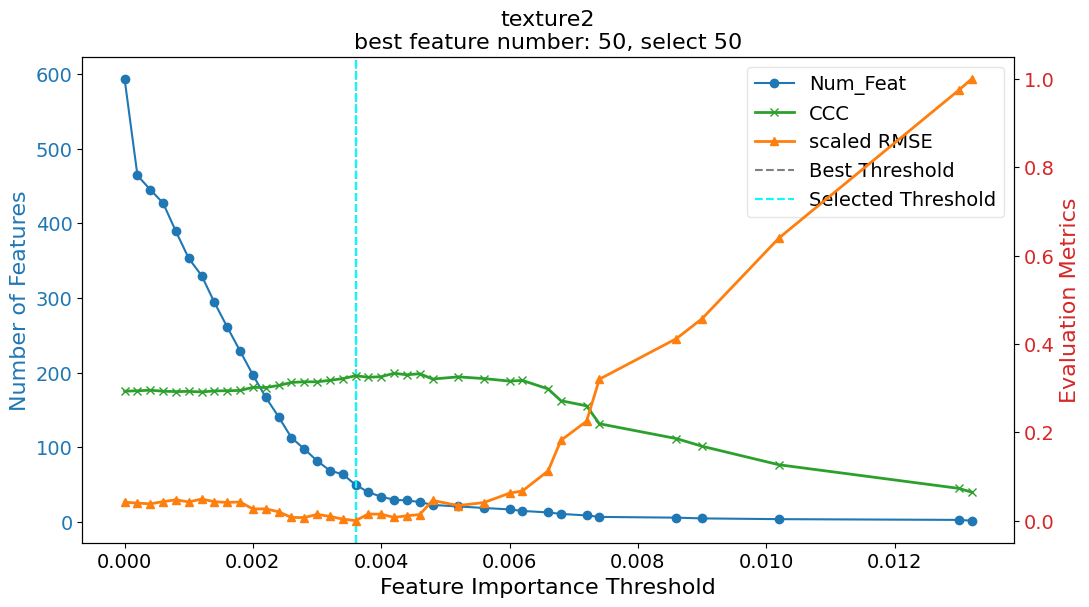

[13:57:32] ----------------------rf------------------------
n_iterations: 5
n_required_iterations: 5
n_possible_iterations: 5
min_resources_: 75
max_resources_: 6089
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 135
n_resources: 75
Fitting 5 folds for each of 135 candidates, totalling 675 fits
----------
iter: 1
n_candidates: 45
n_resources: 225
Fitting 5 folds for each of 45 candidates, totalling 225 fits
----------
iter: 2
n_candidates: 15
n_resources: 675
Fitting 5 folds for each of 15 candidates, totalling 75 fits
----------
iter: 3
n_candidates: 5
n_resources: 2025
Fitting 5 folds for each of 5 candidates, totalling 25 fits
----------
iter: 4
n_candidates: 2
n_resources: 6075
Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [10]:
prop = prop_list[1]   
tgt = prop
cfi2 = cfi_calc(cal, tgt, prop, space, output_folder, version, covar_cols) 
covs2 = rscfi(cal, tgt, prop, space, output_folder, version, covar_cols, cfi2)
models, model_names = parameter_fine_tuning(cal, covs2, tgt, prop, output_folder, version)

# Model evaluation

In [6]:
# covs
covs1 = read_features(f'{output_folder}/feature_selected_texture1_v{version}.txt') # read in
covs2 = read_features(f'{output_folder}/feature_selected_texture2_v{version}.txt') # read in
covs_list = [covs1, covs2]

# data
train = pd.read_parquet(f'{output_folder}/data_train_texture1_v{version}.pq')
test = pd.read_parquet(f'{output_folder}/data_test_texture1_v{version}.pq')
test = test.dropna(subset=covs1+covs2,how='any')
train = train.dropna(subset=covs1+covs2,how='any')
train['texture2_log1p'] = np.log1p(train['texture2'])
test['texture2_log1p'] = np.log1p(test['texture2'])

# models
mdl1 = joblib.load(f'{output_folder}/model_rf.texture1_ccc_v{version}.joblib')
mdl2 = joblib.load(f'{output_folder}/model_rf.texture2_ccc_v{version}.joblib')
model_list = [mdl1, mdl2]

In [12]:
from sklearn.model_selection import LeaveOneGroupOut,GroupKFold,cross_val_predict
# models
keep_col_cv = ['time', 'lat', 'lon', 'id', 'ref', 'nuts0', 'hzn_dep', 'lc_survey','tile_id', 'clay','silt','sand']
keep_col_test = ['time', 'lat', 'lon', 'id', 'ref', 'nuts0', 'hzn_dep', 'lc_survey','tile_id', 'clay','silt','sand']

for i in [0,1]:
    prop = prop_list[i]
    tgt = prop
    covs = covs_list[i]
    fi_df = pd.DataFrame(covs, columns=['feature'])
    
    model = model_list[i]
    model.n_jobs = 90
    model_name = 'rf'

    # cross validation------------------------------------------------------------
    # spatial cv
    cv = GroupKFold(n_splits=5) 
    ttprint(f'start spatial CV for {model_name}')
    y_scv = cross_val_predict(model, train[covs], train[tgt], cv=cv, groups=train['tile_id'])
    ttprint(f'finish temporal CV for {model_name}')
    train[f'{tgt}_cv.spatial_{model_name}'] = y_scv

    # temporal cv
    tgroups = train['time']
    logo = LeaveOneGroupOut()
    ttprint(f'\nstart temporal CV for {model_name}')
    y_tcv = cross_val_predict(model, train[covs], train[tgt], cv=logo.split(train[covs], train[tgt], tgroups))
    ttprint(f'finish temporal CV for {model_name}')
    train[f'{tgt}_cv.loyo_{model_name}'] = y_tcv

    # test---------------------------------------------------------------------------
    ttprint(f'start test prediction for {model_name}')
    model.fit(train[covs], train[tgt])
    y_val = model.predict(test[covs])
    ttprint(f'finish test prediction for {model_name}')
    test[f'{tgt}_test_{model_name}'] = y_val

    # variable importance
    # pfi = permutation_importance(model, test[covs], test[tgt], n_jobs=80, n_repeats=10, random_state=42)
    # fi_df[f'{model_name} permutation importance'] = pfi.importances_mean
    importance_df = pd.DataFrame({'feature': covs, 'importance': model.feature_importances_})
    importance_df = importance_df.sort_values(by='importance', ascending=False)
    importance_df.to_csv(f'{output_folder}/feature_importance_{model_name}_v{version}.csv', index=False)

    keep_col_cv = keep_col_cv + [ prop, tgt, f'{tgt}_cv.loyo_{model_name}', f'{tgt}_cv.spatial_{model_name}']
    keep_col_test = keep_col_test + [prop, tgt, f'{tgt}_test_{model_name}']

    # save
    # date_str = datetime.today().strftime('%Y%m%d')
    fi_df.to_csv(f'{output_folder}/feature_importance_{prop}_v{version}.csv',index=False)
    
train[keep_col_cv].to_csv(f'{output_folder}/prediction_cv_texture_v{version}.csv',index=False)
test[keep_col_test].to_csv(f'{output_folder}/prediction_test_texture_v{version}.csv',index=False)

[13:59:51] start spatial CV for rf
[14:00:05] finish temporal CV for rf
[14:00:05] 
start temporal CV for rf
[14:01:16] finish temporal CV for rf
[14:01:16] start test prediction for rf
[14:01:19] finish test prediction for rf
[14:01:19] start spatial CV for rf
[14:01:28] finish temporal CV for rf
[14:01:28] 
start temporal CV for rf
[14:02:10] finish temporal CV for rf
[14:02:10] start test prediction for rf
[14:02:12] finish test prediction for rf


### calculate metrics and plot accuracy figure

In [2]:
# read in data--------------------------------------------------------------
texture_train = pd.read_csv(f'{output_folder}/prediction_cv_texture_v{version}.csv')
texture_test = pd.read_csv(f'{output_folder}/prediction_test_texture_v{version}.csv')

texture_test[f'sand_test_rf'], texture_test[f'silt_test_rf'], texture_test[f'clay_test_rf'] = textures_bw_transform(texture_test[f'texture1_test_rf'],texture_test[f'texture2_test_rf'])
for test_type in ['cv.spatial', 'cv.loyo']:
    texture_train[f'sand_{test_type}_rf'], texture_train[f'silt_{test_type}_rf'], texture_train[f'clay_{test_type}_rf'] = textures_bw_transform(texture_train[f'texture1_{test_type}_rf'],texture_train[f'texture2_{test_type}_rf'])


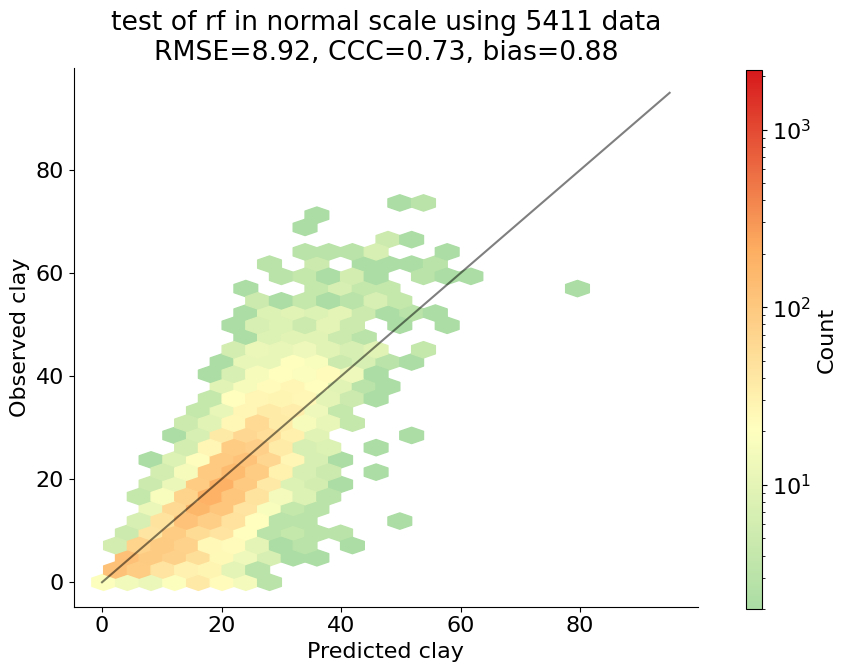

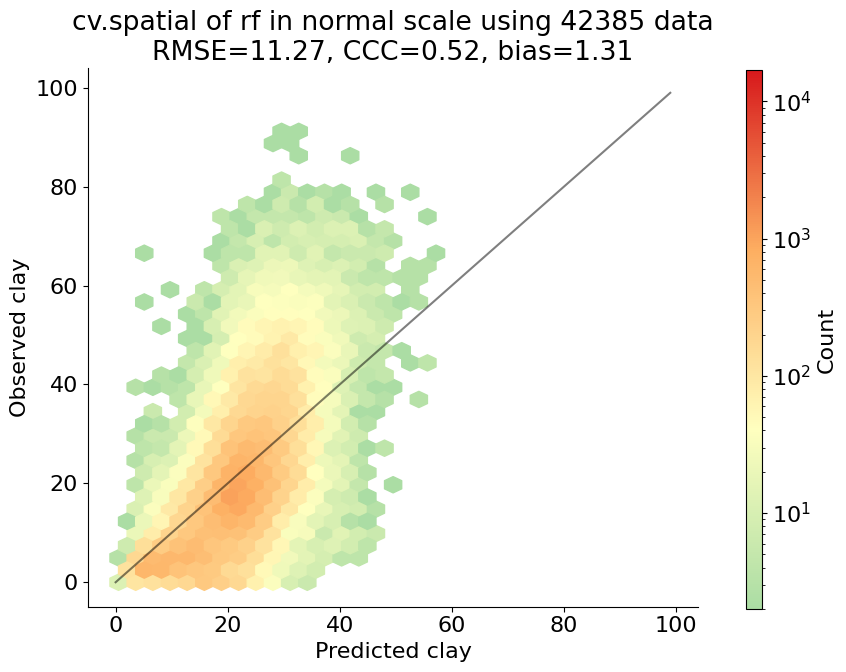

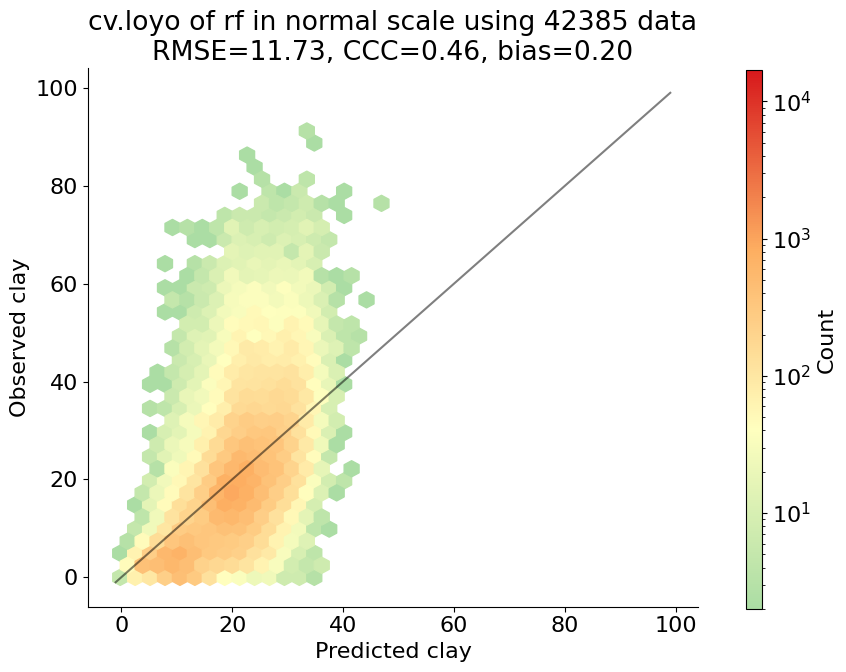

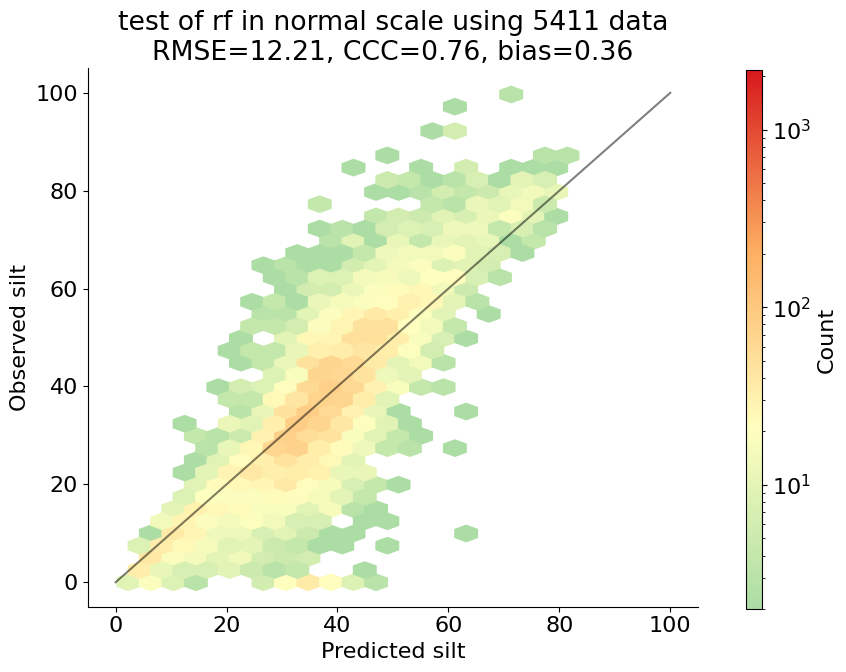

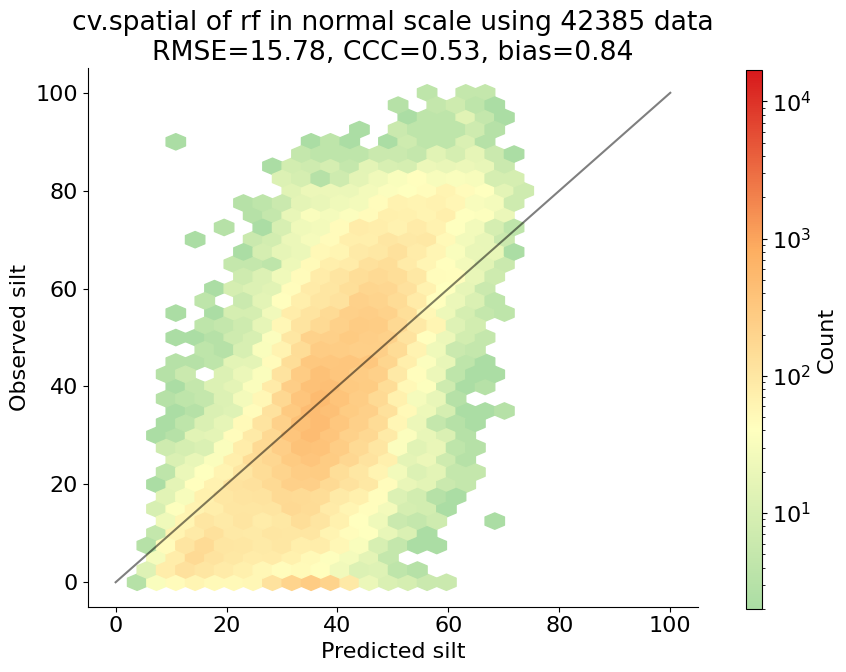

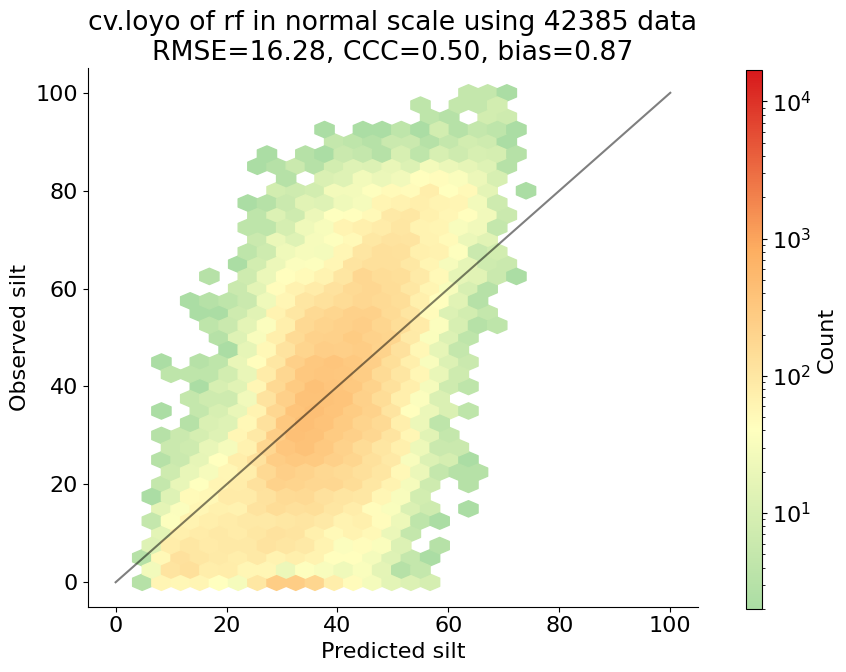

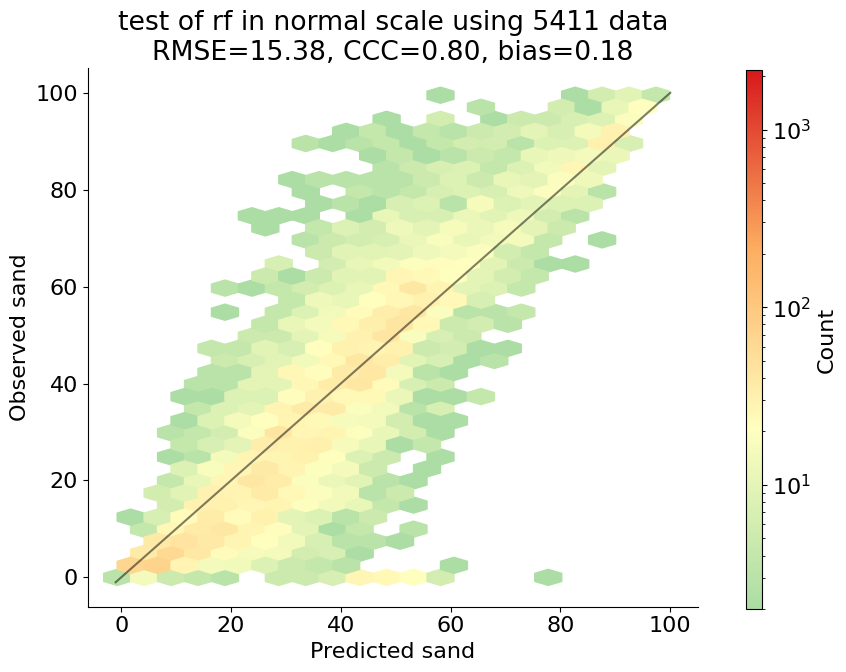

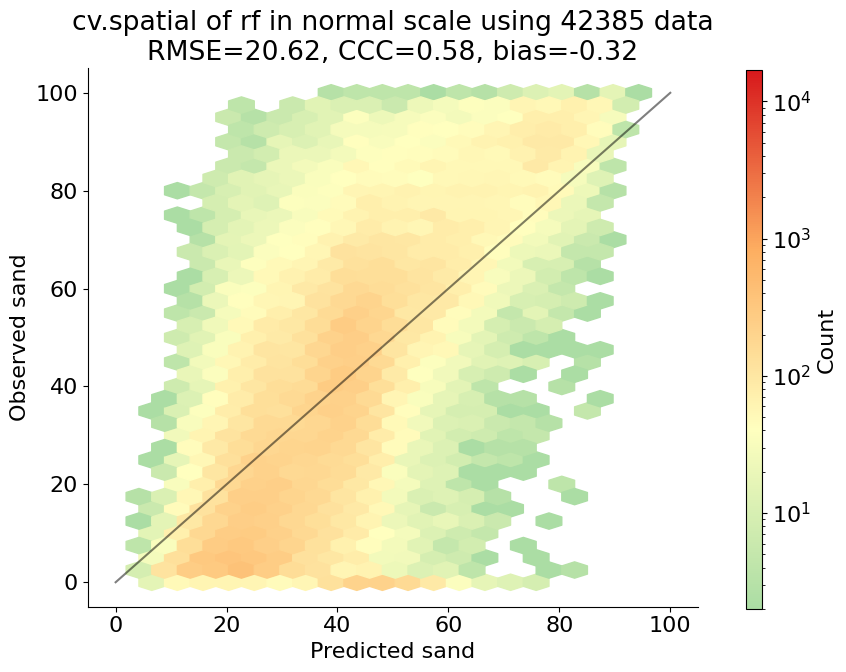

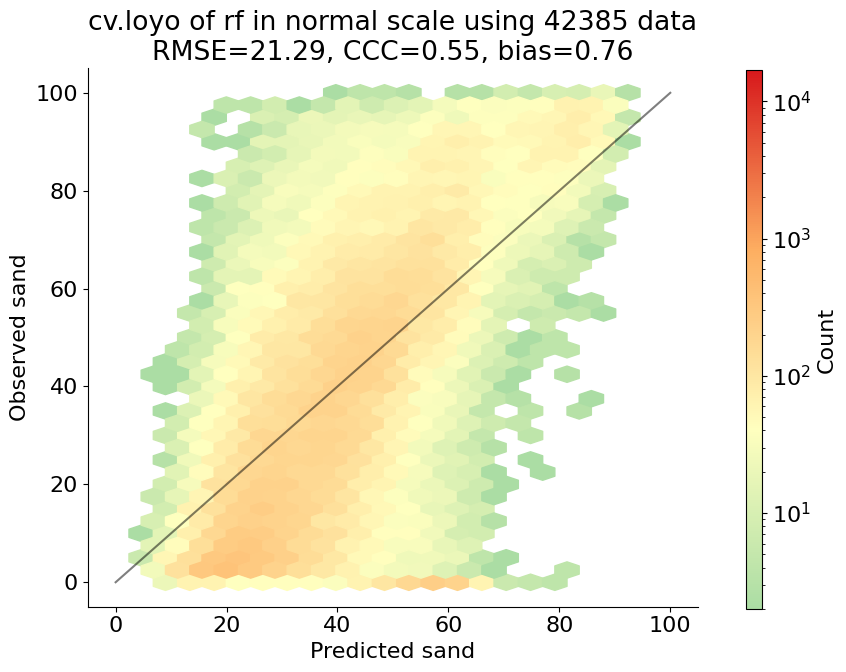

In [3]:
results_cv = []
for tx in ['clay','silt','sand']:
    rmse, mae, medae, mape, ccc, r2, bias = accuracy_plot(texture_test[tx], texture_test[f'{tx}_test_rf'], tx, 'normal', 'rf', 'test', output_folder)
    results_cv.append({
        'prop':tx,
        'model': 'rf',
        'evaluation_type': 'test',
        'RMSE': rmse,
        'MAE': mae,
        'MedAE': medae,
        'MAPE': mape,
        'R2': r2,
        'CCC': ccc,
        'bias': bias
    })
    
    for test_type in ['cv.spatial', 'cv.loyo']:
        rmse, mae, medae, mape, ccc, r2, bias = accuracy_plot(texture_train[tx], texture_train[f'{tx}_{test_type}_rf'], tx, 'normal', 'rf', test_type, output_folder)
        results_cv.append({
            'prop':tx,
            'model': 'rf',
            'evaluation_type': test_type,
            'RMSE': rmse,
            'MAE': mae,
            'MedAE': medae,
            'MAPE': mape,
            'R2': r2,
            'CCC': ccc,
            'bias': bias
        })
        
results_cv = pd.DataFrame(results_cv)
results_cv.to_csv(f'{output_folder}/metrics_texture.prop.csv',index=False)

# Production model

In [8]:

mdl1.n_jobs = 90
mdl2.n_jobs = 90

dff = dff.dropna(subset=covs1+covs2,how='any')

mdl1.fit(dff[covs1], dff['texture1'])
mdl2.fit(dff[covs2], dff['texture2'])

joblib.dump(mdl1, f'{data_path}/production/model_rf.texture1_production_v{version}.joblib')
joblib.dump(mdl2, f'{data_path}/production/model_rf.texture2_production_v{version}.joblib')

['/home/xuemeng/work_xuemeng/soc/SoilHealthDataCube/soil_property_model_pipeline/production/model_rf.texture2_production_v20250212.joblib']